# Plotting and fitting ex-situ spectra of carbon samples

This script is currently only suitable for the 638 nm laser, because most peaks shift according to the laser energy. It can be used to plot data quickly and fit carbon data with 9 bands. 

In [1]:
import pyRamanAnalysis as pyra
import matplotlib.pyplot as plt
import glob as glob
plt.rcParams["font.size"] = 15
plt.rcParams["font.family"] = "Verdana"

# %matplotlib widget


This section loads the data by iterating over all the txt files in your folder and plots it.

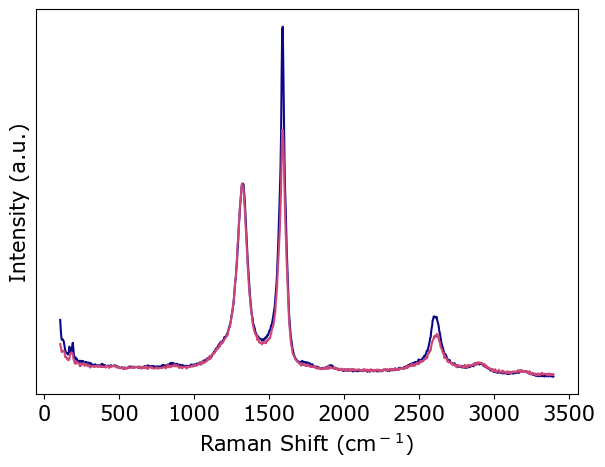

In [2]:
rmn, files = pyra.load_exsitu_data(path = 'example_data')
pyra.plot_exsitu_data(rmn)

This section collects fits the data with 9 bands. First the background is fitted to the parts assigned to it. The optimized parameters are collected in OPTtot. then it plots the fitted data. 

[[1322.8644658038963, 81.5423099062802, 116.17497165137715, 1590.5078339187924, 31.08561100098884, 73.43547780478522, 1617.1537333079364, 21.670501072792533, 6.53020962059045, 1189.0686783674796, 78.14996599703393, 5.720188275375038, 1549.9999999999998, 40.624697031149715, 18.28642963526469, 2471.0424607502537, 70.45080793395965, 1.9936190648586758, 2609.528662599072, 85.09741432635838, 37.14796862698966, 2900.0000000000005, 140.95113050569114, 9.795224616529413, 3184.8281798803678, 58.79287152595193, 1.6077766251044325, -3.1540552157149777e-09, -1.1241411802927673e-05, 0.11514653365433088], [1321.2196454422997, 81.19074209057949, 114.93206724612939, 1590.9999999999998, 37.230196900844604, 61.92973106808868, 1615.364788308505, 21.838963981776274, 5.346530409851848, 1185.1104200953064, 81.9235079741964, 5.987058929889334, 1549.9999999999998, 39.15592381001785, 13.0783355539879, 2482.361111123426, 83.88013248846896, 1.874093432421481, 2614.4897881223264, 95.52528242977496, 26.57753543321

(<Figure size 700x500 with 1 Axes>,
 <Axes: title={'center': 'data\\example'}, xlabel='Raman Shift (cm$^-$$^1$)', ylabel='Intensity (a.u.)'>)

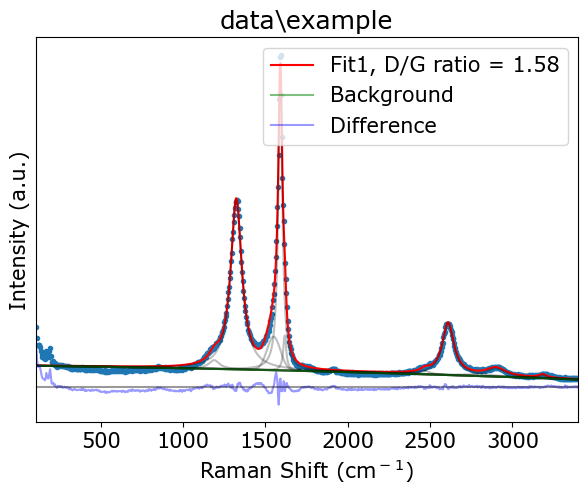

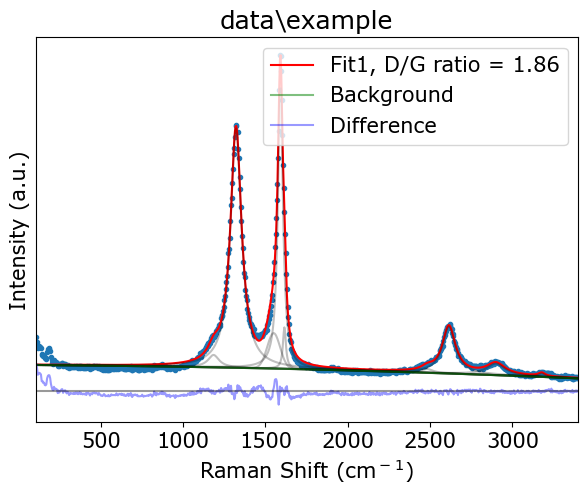

In [3]:
OPTtot = pyra.fit_exsitu_data(rmn, *pyra.define_boundaries())
print(OPTtot)
pyra.plot_fitted_data(OPTtot, rmn ,files)

The last part returns some useful ratios or peak positions for data analysis. It also provides a boxplot of some ratios if you have more spectra per sample. 

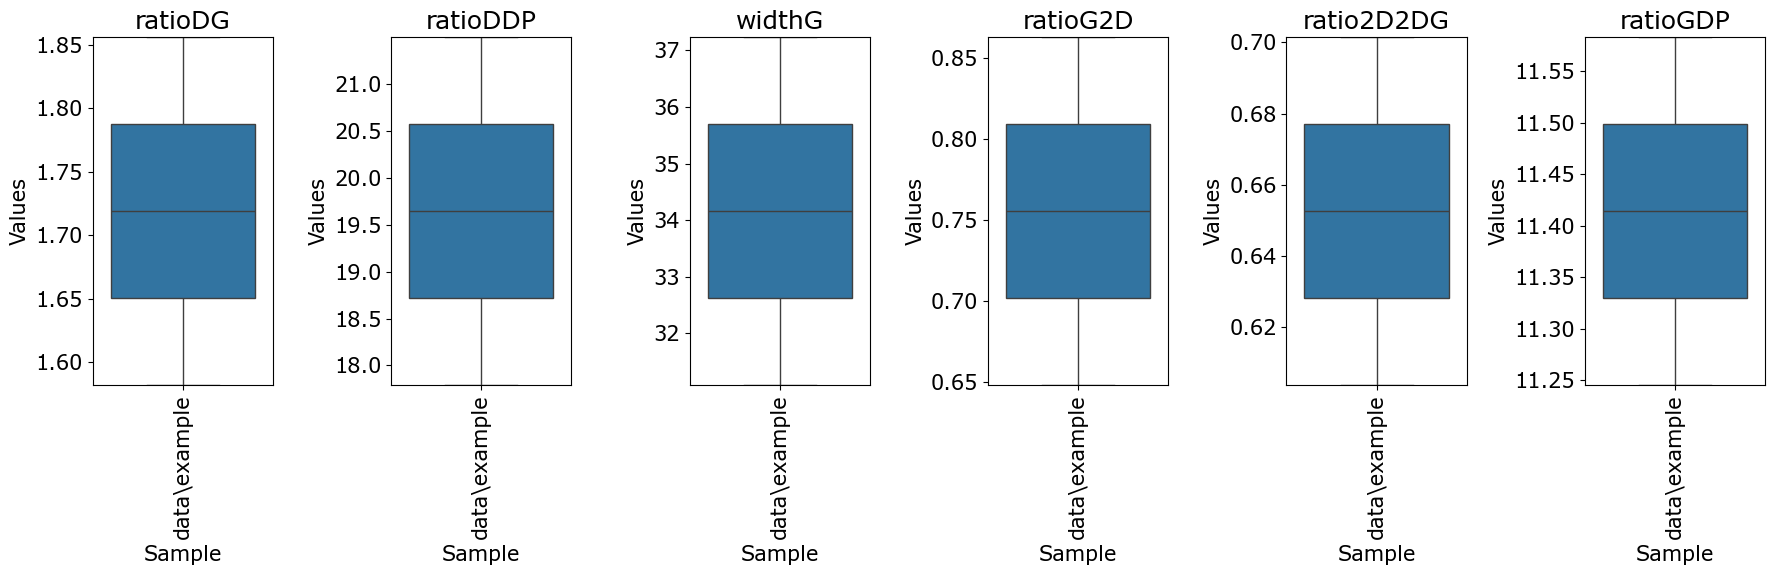

             D            G           D2           D3      D4          2D4  \
0  1322.864466  1590.507834  1617.153733  1189.068678  1550.0  2471.042461   
1  1321.219645  1591.000000  1615.364788  1185.110420  1550.0  2482.361111   

            2D      DG          2D2  
0  2609.528663  2900.0  3184.828180  
1  2614.489788  2900.0  3178.550488  
    ratioDG   ratioDDP     widthG  ratioG2D  ratio2D2DG   ratioGDP  Sample
0  1.582001  17.790389  31.085611  0.862958    0.603737  11.245501       0
1  1.855846  21.496570  37.230197  0.648307    0.701405  11.583163       0


In [4]:
ratios, ppos, pposdf, ratiosdf = pyra.calculate_ratios(OPTtot)
pyra.calculate_group_averages(ratiosdf, files, spectra_per_sample=10)
print(pposdf)
print(ratiosdf)